<a href="https://colab.research.google.com/github/mickvanhulst/twitter_bitcoin_analysis/blob/master/models/CNN_btc_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODO



*  Plot PR curve
* Verify if normalization went correctly.
*   https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html Add MAP for multi-label, as its one-hot encoded we can do multilabel.
* Re-evaluate model architecture for regularization. <-- done
* Test with btc meta-data. Did I add the difference from previous day?
* Write for loop for K-fold test, then run everything, make plots etc for documentations. FINALIZE. SEE IMAGE PHONE.
* After K-Fold, write separate for loop with all the best settings that we found for ensembling.
* visualize network https://github.com/szagoruyko/pytorchviz
* apply styling, see brightspace.
* Apply requirements for literature section.



# Analyze huge matrix data

In [0]:
import os
import re
import numpy as np
from google.colab import drive

def tryint(s):
    try:
        return int(s)
    except ValueError:
        return s
     
def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def sort_nicely(l):
    """ Sort the given list in the way that humans expect.
    
    amazing <3 RegExp
    """
    l.sort(key=alphanum_key)
    return l

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
indices = indices_to_remove_train

In [0]:
train_classes, train_user_data, train_matrices, train_dates, train_btc_meta_data, train_classes_t = None, None, None, None, None, None
base_str = '/content/gdrive/My Drive/Colab Notebooks/data/btc/keywords_tfidf_p/count/train/'
files = os.listdir(base_str)
cnt_c, cnt_ct = 0, 0

for train_file in sort_nicely(files):
#     temp = np.load(base_str + train_file)
#     cur_cnt += temp.shape[0]
    
#     temp = np.delete(temp, indices, axis=0)
#     before_removal = [x for x in indices if x >= cur_cnt]
#     print(before_removal)
#     last_elem = before_removal[-1]
#     indices = before_removal
#     indices = [x - last_elem for x in indices if x >= cur_cnt]
    
    if 'btc' in train_file:
        a = 1
    #     temp = np.load(base_str + train_file)
    #     if train_btc_meta_data is None:
    #         train_btc_meta_data = temp
    #     else:
    #         train_btc_meta_data = np.concatenate((train_btc_meta_data, temp), axis=0)
    elif 'tc_up' in train_file:
        temp = np.load(base_str + train_file)
        sh = temp.shape[0]
        if train_classes_t is None:
            if cnt_ct == 0:
                indices = indices_to_remove_train
            cnt_ct += 1
            temp = np.delete(temp, indices, axis=0)
            
            before_removal = [x for x in indices if x <= sh]
            last_elem = before_removal[-1]
            indices = [x - last_elem for x in indices if x > sh]
        
            train_classes_t = temp
            
            if len(train_classes_t) == 0:
                train_classes_t = None
        else:
            temp = np.delete(temp, indices, axis=0)
            
            before_removal = [x for x in indices if x <= sh]
            last_elem = before_removal[-1]
            indices = [x - last_elem for x in indices if x > sh]
            
            if len(temp) > 0:
                train_classes_t = np.hstack((train_classes_t, temp))
    elif 'c_up' in train_file:
        temp = np.load(base_str + train_file)
        sh = temp.shape[0]
        if train_classes is None:
            if cnt_c == 0:
                indices = indices_to_remove_train
            cnt_c += 1
            temp = np.delete(temp, indices)
            
            before_removal = [x for x in indices if x <= sh]
            last_elem = before_removal[-1]
            indices = [x - last_elem for x in indices if x > sh]
        
            train_classes = temp

            if len(train_classes) == 0:
                train_classes = None
        else:
            temp = np.delete(temp, indices)
            
            before_removal = [x for x in indices if x <= sh]
            last_elem = before_removal[-1]
            indices = [x - last_elem for x in indices if x > sh]
            
            if len(temp) > 0:
                train_classes = np.hstack((train_classes, temp))
    elif 'md_up' in train_file:
        temp = np.load(base_str + train_file)
        sh = temp.shape[0]
        if train_user_data is None:
            indices = indices_to_remove_train
            temp = np.delete(temp, indices, axis=0)
            
            before_removal = [x for x in indices if x <= sh]
            last_elem = before_removal[-1]
            indices = [x - last_elem for x in indices if x > sh]
        
            train_user_data = temp
        else:
            temp = np.delete(temp, indices, axis=0)
            
            before_removal = [x for x in indices if x <= sh]
            last_elem = before_removal[-1]
            indices = [x - last_elem for x in indices if x > sh]
            
            train_user_data = np.vstack((train_user_data, temp))
    elif 'dp_up' in train_file:
        temp = np.load(base_str + train_file)
        sh = temp.shape[0]
        if train_matrices is None:
            indices = indices_to_remove_train
            temp = np.delete(temp, indices, axis=0)
            
            before_removal = [x for x in indices if x <= sh]
            last_elem = before_removal[-1]
            indices = [x - last_elem for x in indices if x > sh]
        
            train_matrices = temp
        else:
            temp = np.delete(temp, indices, axis=0)
            
            before_removal = [x for x in indices if x <= sh]
            last_elem = before_removal[-1]
            indices = [x - last_elem for x in indices if x > sh]
            
            train_matrices = np.vstack((train_matrices, temp))
#     elif 'dt_up' in train_file:
# #         temp = np.load(base_str + train_file)
#         if train_dates is None:
#             indices = indices_to_remove_train
#             temp = np.delete(temp, indices, axis=0)
            
#             train_dates = temp
#         else:
#             train_dates = np.concatenate((train_dates, temp), axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:101: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:109: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:89: Deprecat

In [0]:
train_user_data.shape, train_matrices.shape, train_classes.shape

((85706, 8), (85706, 1000, 7), (85706,))

In [0]:
test_user_data, test_dates = None, None
base_str = '/content/gdrive/My Drive/Colab Notebooks/data/btc/keywords_tfidf_p/count/test/'
files = os.listdir(base_str)
cur_cnt = 0
for train_file in sort_nicely(files):
    temp = np.load(base_str + train_file)
    
    
    
    cur_cnt += temp.shape[0]
    # if 'btc' in train_file:
    #     temp = np.load(base_str + train_file)
    #     if train_btc_meta_data is None:
    #         train_btc_meta_data = temp
    #     else:
    #         train_btc_meta_data = np.concatenate((train_btc_meta_data, temp), axis=0)
    # elif 'tc_up' in train_file:
    #     temp = np.load(base_str + train_file)
    #     if train_classes_t is None:
    #         train_classes_t = temp
    #     else:
    #         train_classes_t = np.concatenate((train_classes_t, temp), axis=0)
    # elif 'c_up' in train_file:
    #     temp = np.load(base_str + train_file)
    #     if train_classes is None:
    #         train_classes = temp
    #     else:
    #         train_classes = np.concatenate((train_classes, temp), axis=0)
    # elif 'md_up' in train_file:
    if 'md_up' in train_file:
        temp = np.load(base_str + train_file)
        if test_user_data is None:
            test_user_data = temp
        else:
            test_user_data = np.vstack((test_user_data, temp))
#     elif 'dp_up' in train_file:
#         temp = np.load(base_str + train_file)
#         if train_matrices is None:
#             train_matrices = temp
#         else:
#             train_matrices = np.vstack((train_matrices, temp))
    elif 'dt_up' in train_file:
        temp = np.load(base_str + train_file)
        if test_dates is None:
            test_dates = temp
        else:
            test_dates = np.concatenate((test_dates, temp), axis=0)

In [0]:
# indices_to_remove_train = [x for x in range(0, 18402)]
# indices_to_remove_test = []
train_user_data.shape, test_user_data.shape, test_dates.shape, train_dates.shape

((121906, 8), (22081, 8), (22081,), (121906,))

In [0]:
from datetime import datetime

datetime.fromtimestamp(train_dates[18402] * mult_by).strftime('%Y-%m-%d')

# Only take >= 2018
# indices_to_remove.append(range(0, 18402))
# train_user_data = train_user_data[18402:]

In [0]:
perc = 15
indices = np.argwhere(train_user_data[:, 1] <= np.percentile(train_user_data[:, 1], perc)).flatten()
np.percentile(train_user_data[:, 1], perc)
indices_to_remove_train.extend(indices)
# train_user_data = np.delete(train_user_data, indices, axis=0)
#train_dates = np.delete(train_dates, indices, axis=0)

In [0]:
indices = []
test_user_ids = np.unique(test_user_data[:,-1])
for i in range(len(train_user_data[:,-1])):
    if train_user_data[i,-1] not in test_user_ids:
        indices.append(i)
        
len(indices) / len(train_user_data[:,-1])
indices_to_remove_train.extend(indices)

In [0]:
train_user_data = np.delete(train_user_data, indices, axis=0)
train_dates = np.delete(train_dates, indices, axis=0)

In [0]:
indices = []
train_user_ids = np.unique(train_user_data[:,-1])
for i in range(len(test_user_data[:,-1])):
    if test_user_data[i,-1] not in train_user_ids:
        indices.append(i)

indices_to_remove_test.extend(indices)
len(indices) / len(test_user_data[:,-1])

0.24138399529006838

In [0]:
len(indices_to_remove_test)

5330

In [0]:
test_user_data = np.delete(test_user_data, indices, axis=0)
test_dates = np.delete(test_dates, indices, axis=0)

# Install PyTorch

In [1]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

!pip install git+git://github.com/mickvanhulst/livelossplot.git --upgrade

tcmalloc: large alloc 1073750016 bytes == 0x5c32e000 @  0x7ff84326b2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
0.4.0
True
  Cloning git://github.com/mickvanhulst/livelossplot.git to /tmp/pip-req-build-pw9sql3p
  Running setup.py bdist_wheel for livelossplot ... - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-u668d9yy/wheels/73/e2/09/79ee9f5b0be18dc9c6ee17f0dc181708c1cf9513c70053ca92
Successfully built livelossplot


# Test if GPU enabled

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Load packages

In [0]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.utils.data as utils

import matplotlib
import matplotlib.pyplot as plt

from google.colab import drive

import numpy as np
import time
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import os
import re

# Mount Drive and open matrices

In [6]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
def tryint(s):
    try:
        return int(s)
    except ValueError:
        return s
     
def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def sort_nicely(l):
    """ Sort the given list in the way that humans expect.
    
    amazing <3 RegExp
    """
    l.sort(key=alphanum_key)
    return l

In [0]:
model_type = ['keywords_tfidf_p', 'keywords_tfidf', 'keywords_clusters', 'custom_features'][0]
mode = ['count', 'binary'][0]
INPUT_SIZE_CNN = 25 if model_type == 'keywords_clusters' else 126 if 'custom' in model_type else 500
train, test = None, None

In [651]:
train_classes, train_user_data, train_matrices, train_dates, train_btc_meta_data, train_classes_t = None, None, None, None, None, None
base_str = '/content/gdrive/My Drive/Colab Notebooks/data/btc/{}/{}/train/'.format(model_type, mode)
files = os.listdir(base_str)
for train_file in sort_nicely(files):
    if 'btc' in train_file:
        temp = np.load(base_str + train_file)
        if train_btc_meta_data is None:
            train_btc_meta_data = temp
        else:
            train_btc_meta_data = np.concatenate((train_btc_meta_data, temp), axis=0)
    elif 'tc_up' in train_file:
        temp = np.load(base_str + train_file)
        if train_classes_t is None:
            train_classes_t = temp
        else:
            train_classes_t = np.concatenate((train_classes_t, temp), axis=0)
    elif 'c_up' in train_file:
        temp = np.load(base_str + train_file)
        if train_classes is None:
            train_classes = temp
        else:
            train_classes = np.concatenate((train_classes, temp), axis=0)
    elif 'md_up' in train_file:
        temp = np.load(base_str + train_file)
        if train_user_data is None:
            train_user_data = temp
        else:
            train_user_data = np.vstack((train_user_data, temp))
    elif 'dp_up' in train_file:
        temp = np.load(base_str + train_file)
        if train_matrices is None:
            train_matrices = temp
        else:
            train_matrices = np.vstack((train_matrices, temp))
    elif 'dt_up' in train_file:
        temp = np.load(base_str + train_file)
        if train_dates is None:
            train_dates = temp
        else:
            train_dates = np.concatenate((train_dates, temp), axis=0)

print('Train shapes: ', train_classes_t.shape, train_classes.shape, train_user_data.shape, 
      train_matrices.shape, train_dates.shape, train_btc_meta_data.shape)

Train shapes:  (102413,) (102413,) (102413, 8) (102413, 500, 7) (102413,) (102413, 8, 7)


In [652]:
test_classes, test_user_data, test_matrices, test_dates, test_btc_meta_data, test_classes_t = None, None, None, None, None, None
base_str = '/content/gdrive/My Drive/Colab Notebooks/data/btc/{}/{}/test/'.format(model_type, mode)

for test_file in sort_nicely(os.listdir(base_str)):
    if 'btc' in test_file:
        temp = np.load(base_str + test_file)
        if test_btc_meta_data is None:
            test_btc_meta_data = temp
        else:
            test_btc_meta_data = np.concatenate((test_btc_meta_data, temp), axis=0)
    elif 'tc_up' in test_file:
        temp = np.load(base_str + test_file)
        if test_classes_t is None:
            test_classes_t = temp
        else:
            test_classes_t = np.concatenate((test_classes_t, temp), axis=0)
    elif 'c_up' in test_file:
        temp = np.load(base_str + test_file)
        if test_classes is None:
            test_classes = temp
        else:
            test_classes = np.concatenate((test_classes, temp), axis=0)
    elif 'md_up' in test_file:
        temp = np.load(base_str + test_file)
        if test_user_data is None:
            test_user_data = temp
        else:
            test_user_data = np.vstack((test_user_data, temp))
    elif 'dp_up' in test_file:
        temp = np.load(base_str + test_file)
        if test_matrices is None:
            test_matrices = temp
        else:
            test_matrices = np.vstack((test_matrices, temp))
    elif 'dt_up' in test_file:
        temp = np.load(base_str + test_file)
        if test_dates is None:
            test_dates = temp
        else:
            test_dates = np.concatenate((test_dates, temp), axis=0)
            
print('Test shapes: ', test_classes_t.shape, test_classes.shape, test_user_data.shape, 
      test_matrices.shape, test_dates.shape, test_btc_meta_data.shape)

Test shapes:  (21841,) (21841,) (21841, 8) (21841, 500, 7) (21841,) (21841, 8, 7)


In [627]:
train_matrices.shape

(144578, 25, 7)

In [539]:
# test_btc_meta_data = test_btc_meta_data[:,3:, :]
# train_btc_meta_data = train_btc_meta_data[:,3:, :]
# test_btc_meta_data.shape

(21853, 5, 7)

## Re-assign userIds and normalize data

In [0]:
# Re-assign tokens for userIds as this makes normalization easier (no precision errors).
unique_users = np.unique(np.concatenate((np.unique(train_user_data[:,-1]), np.unique(test_user_data[:,-1]))))
user_ids = {}
for i, v in enumerate(unique_users):
    user_ids[v] = (i+1)

for i, v in enumerate(train_user_data):
    train_user_data[i,-1] = user_ids[v[-1]]
    
for i, v in enumerate(test_user_data):
    test_user_data[i,-1] = user_ids[v[-1]]

In [0]:
scaler = StandardScaler()
scaler.fit(train_user_data)
train_user_data = scaler.transform(train_user_data)
test_user_data = scaler.transform(test_user_data)

In [533]:
train_user_data

array([[-0.05186127, -0.19402522, -0.05550569, ..., -0.20483243,
         0.139002  , -0.29299369],
       [-0.05186127, -0.18391387, -0.28244212, ..., -0.27810123,
         0.67812954,  0.31721014],
       [-0.05186127, -0.05846644, -0.06414656, ...,  0.49418546,
        -1.66707529, -1.40823477],
       ...,
       [-0.05186127, -0.21341457, -0.3242821 , ...,  3.7507878 ,
        -0.26534366, -0.4979794 ],
       [-0.05186127, -0.22719268, -0.0682396 , ..., -0.35271236,
         0.59726041,  0.07895139],
       [-0.05186127,  0.01803539, -0.18921172, ...,  0.13611917,
         0.81291143,  0.8020459 ]])

In [0]:
scalers = {}
for i in range(train_btc_meta_data.shape[2]):
    scalers[i] = StandardScaler()
    train_btc_meta_data[:, :, i] = scalers[i].fit_transform(train_btc_meta_data[:, :, i]) 

for i in range(test_btc_meta_data.shape[2]):
    test_btc_meta_data[:, :, i] = scalers[i].transform(test_btc_meta_data[:, :, i]) 

In [0]:
scalers = {}
for i in range(train_matrices.shape[2]):
    scalers[i] = StandardScaler()
    train_matrices[:, :, i] = scalers[i].fit_transform(train_matrices[:, :, i]) 

for i in range(test_matrices.shape[2]):
    test_matrices[:, :, i] = scalers[i].transform(test_matrices[:, :, i]) 

## Small text to see if flattening matrix and predicting directly with LR would have worked (absolutely sucks xD)

In [0]:
from sklearn.linear_model import LogisticRegression
X_inter = train_matrices[:, :int(train_matrices.shape[1]), :]
X_train = X_inter.reshape(X_inter.shape[0], -1)

X_train = X_train[:, :int(X_train.shape[1]/4)]
y_train = train_classes
# train_matrices = None

# instantiate the model (using the default parameters)
logreg = LogisticRegression(C=0.4, verbose=2)

In [0]:
# fit the model with data
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=2, warm_start=False)

In [0]:
y_pred = logreg.predict_proba(X_train)


In [0]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5,257.44,'Predicted label')

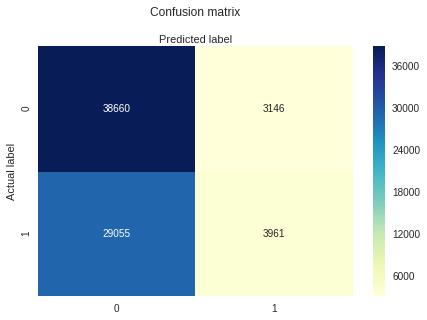

In [0]:
y_pred = logreg.predict(X_train)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_train, y_pred)
cnf_matrix

%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
from sklearn.metrics import average_precision_score
auc = average_precision_score(y_train, y_pred[:,1])
auc

0.4986545768362581

Average precision-recall score: 0.50


Text(0.5,1,'2-class Precision-Recall curve: AP=0.50')

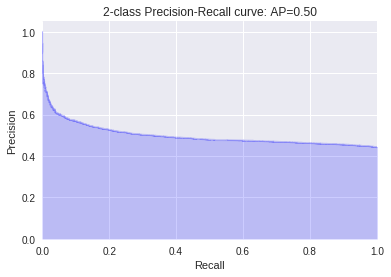

In [0]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

# auc, y, pred = test_model(test_loader, multi_class)
# losses, auc, y, pred = validate_model(val_loader, multi_class)
# losses, auc, y, pred = train_model(train_loader, multi_class)

# preds = [1 if x > 0.5 else 0 for x in pred]
# print(np.unique(preds, return_counts=True))
# print(np.unique(y, return_counts=True))
# print('The accuracy is: {}'.format(accuracy_score(y, preds)))
y, pred = y_train, y_pred[:,1]

average_precision = average_precision_score(y, pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(y, pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# Some analysis

## Feature analysis

In [0]:
'''
Calculates feature importance for each feature on a day-by-day basis.

This way we can evaluate which feature of a particular day is important
in comparison to the class result.
'''

from sklearn.feature_selection import mutual_info_classif

# Calculate impact of features on classes separately.
train_mi = {}
train_mi_tc = {}
for i in range(train_matrices.shape[2]):
    train_mi[i] = mutual_info_classif(train_matrices[:, :, i], train_classes)
    train_mi_tc[i] = mutual_info_classif(train_matrices[:, :, i], train_classes_t)
    print('Done {}'.format(i / train_matrices.shape[2]))

np.save('/content/gdrive/My Drive/Colab Notebooks/data/btc/train_mi_c.npy', np.array(train_mi))
np.save('/content/gdrive/My Drive/Colab Notebooks/data/btc/train_mi_tc.npy', np.array(train_mi_tc))

Done 0.0
Done 0.14285714285714285
Done 0.2857142857142857
Done 0.42857142857142855
Done 0.5714285714285714
Done 0.7142857142857143
Done 0.8571428571428571


In [0]:

np.sum(np.sum(train_mi_tc[i] for i in range(7)))

0.8319400209859054

## Check distribution of nonzeroes for training matrices and test data

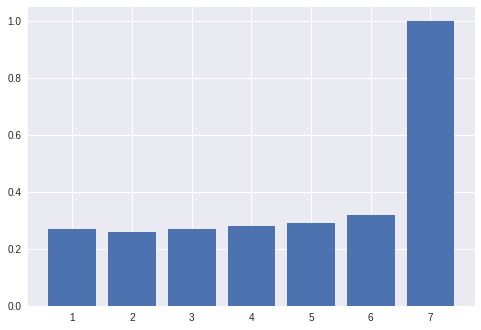

[49130, 32207, 21824, 14793, 13843, 6862, 5919]


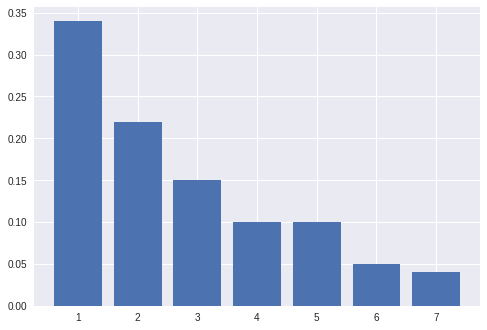

In [0]:
copy_train = train_matrices
copy_test = test_matrices
copy_train_user_data = train_user_data
copy_test_user_data = test_user_data

# How many of the training matrices just have 1 non-row column.
cnt = 0
indices = []
dist = [0, 0, 0, 0, 0, 0, 0]
amnt_dist = [0, 0, 0, 0, 0, 0, 0]
for i in range(len(copy_train)):
    sum_of_matrix = copy_train[i].sum(axis=0)
    nonzeroes = np.nonzero(sum_of_matrix)[0]
    for j in nonzeroes:
        dist[j] += 1
    
    amnt_non_zero = len(nonzeroes)
    amnt_dist[amnt_non_zero-1] += 1
    if amnt_non_zero == 1:
        cnt +=1
        indices.append(i)
# Which days are filled.
plt.bar(range(1, 8), [round(x / len(copy_train), 2) for x in dist])
plt.show()
print(amnt_dist)
plt.bar(range(1, 8), [round(x / len(copy_train), 2) for x in amnt_dist])
plt.show()


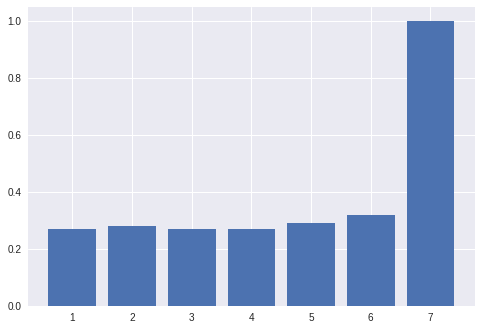

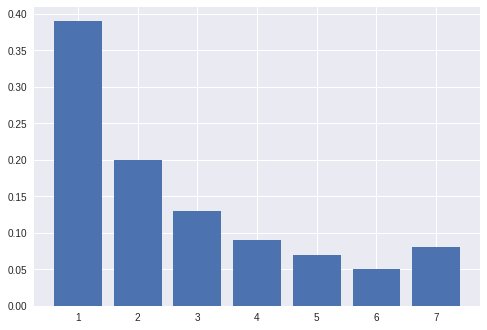

In [0]:
# How many of the training matrices just have 1 non-row column.
cnt = 0
indices = []
dist = [0, 0, 0, 0, 0, 0, 0]
amnt_dist = [0, 0, 0, 0, 0, 0, 0]

for i in range(len(copy_test)):
    sum_of_matrix = copy_test[i].sum(axis=0)
    nonzeroes = np.nonzero(sum_of_matrix)[0]
    for j in nonzeroes:
        dist[j] += 1
    
    amnt_non_zero = len(nonzeroes)
    amnt_dist[amnt_non_zero-1] += 1
    if amnt_non_zero == 1:
        cnt +=1
        indices.append(i)
plt.bar(range(1, 8), [round(x / len(copy_test), 2) for x in dist])
plt.show()

plt.bar(range(1, 8), [round(x / len(copy_test), 2) for x in amnt_dist])
plt.show()

In [0]:
# train_matrices = np.delete(copy_train, indices, axis=0)
# train_classes = np.delete(train_classes, indices)
# train_user_data = np.delete(train_user_data, indices, axis=0)
# train_dates = np.delete(train_dates, indices)
# train_matrices.shape, train_classes.shape, train_user_data.shape

((63241, 25, 7), (63241,), (63241, 8))

## See which test users are not in train

In [657]:
indices = []
test_user_ids = np.unique(test_user_data[:,-1])
for i in range(len(train_user_data[:,-1])):
    if train_user_data[i,-1] not in test_user_ids:
        indices.append(i)
        
len(indices) / len(train_user_data[:,-1])

0.0251139991993204

In [658]:
train_matrices = np.delete(train_matrices, indices, axis=0)
train_classes_t = np.delete(train_classes_t, indices)
train_classes = np.delete(train_classes, indices)
train_user_data = np.delete(train_user_data, indices, axis=0)
train_btc_meta_data = np.delete(train_btc_meta_data, indices, axis=0)
train_dates = np.delete(train_dates, indices)
train_matrices.shape, train_classes_t.shape, train_user_data.shape

((99841, 500, 7), (99841,), (99841, 8))

## Check distribution of user-data to find important users.

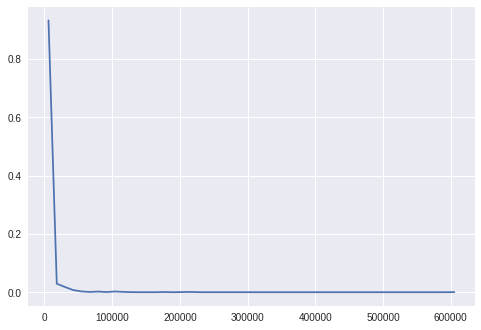

In [0]:
'''
TODO: find important users and filter entire dataset, including test set based on
those userIds. So every user that occurs in the test set, should also occur in 
training set. Else, it's removed.

Perhaps that should be my main criteria, not the amount of followers.
'''
# [['verified', 'followers_count', 'friends_count',
#                                'listed_count', 'favourites_count', 'statuses_count', 'unix_months',
#                                'twitter_user_id']]


# Histogram
heights,bins = np.histogram(copy_train_user_data[:, 1],bins=50)

# Normalize
heights = heights/float(sum(heights))
binMids=bins[:-1]+np.diff(bins)/2.
plt.plot(binMids,heights)

In [659]:
perc = 10
indices = np.argwhere(train_user_data[:, 1] <= np.percentile(train_user_data[:, 1], perc)).flatten()

train_matrices = np.delete(train_matrices, indices, axis=0)
train_classes_t = np.delete(train_classes_t, indices)
train_classes = np.delete(train_classes, indices)
train_user_data = np.delete(train_user_data, indices, axis=0)
train_btc_meta_data = np.delete(train_btc_meta_data, indices, axis=0)
train_dates = np.delete(train_dates, indices)
train_matrices.shape, train_classes_t.shape, train_user_data.shape

((89760, 500, 7), (89760,), (89760, 8))

In [211]:
np.unique(train_classes_t)

array([-1,  0,  1])

In [0]:
# indices = np.argwhere(test_user_data[:, 1] <= np.percentile(train_user_data[:, 1], perc)).flatten()

# test_matrices = np.delete(test_matrices, indices, axis=0)
# test_classes_t = np.delete(test_classes_t, indices)
# test_user_data = np.delete(test_user_data, indices, axis=0)
# test_btc_meta_data = np.delete(test_btc_meta_data, indices, axis=0)
# test_dates = np.delete(test_dates, indices)
# test_matrices.shape, test_classes_t.shape, test_user_data.shape,test_dates.shape

((15753, 500, 7), (15753,), (15753, 8), (15753,))

### Compare occurences users training versus test set

In [0]:
unique, counts = np.unique(train_user_data[:,-1], return_counts=True)
cnt_train = dict(zip(unique, counts))
unique, counts = np.unique(test_user_data[:,-1], return_counts=True)
cnt_test = dict(zip(unique, counts))

cnt_train, cnt_test

({-1.8449034827976734: 8,
  -1.8379357715339544: 1,
  -1.8191229511219125: 44,
  -1.8121552398581933: 1,
  -1.8079746130999619: 5,
  -1.8017036729626146: 7,
  -1.7877682504351762: 1,
  -1.7856779370560605: 19,
  -1.780103768045085: 32,
  -1.7794069969187132: 21,
  -1.7752263701604816: 17,
  -1.7612909476330432: 2,
  -1.7592006342539275: 1,
  -1.7515361518638364: 13,
  -1.7417813560946296: 1,
  -1.7403878138418856: 1,
  -1.7396910427155137: 4,
  -1.7257556201880755: 2,
  -1.7243620779353315: 47,
  -1.7111234265342652: 7,
  -1.6992783173859425: 63,
  -1.6902202927431076: 6,
  -1.686039665984876: 19,
  -1.685342894858504: 20,
  -1.6804654969739006: 13,
  -1.6790719547211568: 10,
  -1.677678412468413: 22,
  -1.6721042434574376: 1,
  -1.6707107012046938: 4,
  -1.6700139300783219: 3,
  -1.6651365321937184: 26,
  -1.6623494476882308: 1,
  -1.6616526765618589: 1,
  -1.660955905435487: 67,
  -1.660259134309115: 2,
  -1.6595623631827432: 19,
  -1.650504338539908: 62,
  -1.6498075674135362: 10,
 

## See which train users are not in test

In [660]:
indices = []
train_user_ids = np.unique(train_user_data[:,-1])
for i in range(len(test_user_data[:,-1])):
    if test_user_data[i,-1] not in train_user_ids:
        indices.append(i)
        
len(indices) / len(test_user_data[:,-1])

0.17728126001556704

In [661]:
test_matrices = np.delete(test_matrices, indices, axis=0)
test_classes_t = np.delete(test_classes_t, indices)
test_classes = np.delete(test_classes, indices)
test_user_data = np.delete(test_user_data, indices, axis=0)
test_btc_meta_data = np.delete(test_btc_meta_data, indices, axis=0)
test_dates = np.delete(test_dates, indices)
test_matrices.shape, test_classes_t.shape, test_user_data.shape

((17969, 500, 7), (17969,), (17969, 8))

### Compare occurences users training versus test set

In [0]:
'''
NOTE: Amount of occurences is SUPER low, so I'm pretty sure we can't map any 
relevant information for a user.
'''

unique, counts = np.unique(train_user_data[:,-1], return_counts=True)
cnt_train = dict(zip(unique, counts))
unique, counts = np.unique(test_user_data[:,-1], return_counts=True)
cnt_test = dict(zip(unique, counts))

list_users_occ = [k for k,v in cnt_train.items() if v > 10]
list_users_occ, cnt_train

([8.39137366786943e-05,
  0.0009230511034656374,
  0.0013426197868591089,
  0.001678274733573886,
  0.0028530670470756064,
  0.0034404632038264665,
  0.0037761181505412437,
  0.004363514307292104,
  0.004699169254006881,
  0.005034824200721658,
  0.005118737937400353,
  0.00545439288411513,
  0.005873961567508601,
  0.005957875304187296,
  0.00604178904086599,
  0.0062096165142233786,
  0.006964840144331627,
  0.008223546194512042,
  0.009230511034656374,
  0.009314424771335067,
  0.009398338508013762,
  0.009817907191407233,
  0.01015356213812201,
  0.010405303348158094,
  0.010740958294872871,
  0.010824872031551564,
  0.01090878576823026,
  0.010992699504908953,
  0.011412268188302425,
  0.011496181924981119,
  0.012167491818410673,
  0.012587060501804146,
  0.01367793907862717,
  0.014181421498699337,
  0.014600990182092809,
  0.015188386338843668,
  0.015272300075522363,
  0.016279264915666693,
  0.016447092389024084,
  0.01653100612570278,
  0.01661491986238147,
  0.0169505748090

# Device config


In [554]:
# Device configuration
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

# One-hot encoding

In [0]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categories='auto')
enc.fit(train_classes_t.reshape(-1, 1))

# 3. Transform
train_classes_t = enc.transform(train_classes_t.reshape(-1, 1)).toarray()
test_classes_t = enc.transform(test_classes_t.reshape(-1, 1)).toarray()

## Check class imbalance

In [0]:
cnt_1, cnt_2, cnt_3 = 0, 0, 0
for i in test_classes_t:
    j = list(i)
    if j == [1, 0, 0]:
        cnt_1+=1
    elif j == [0, 1, 0]:
        cnt_2+=1
    elif j == [0, 0, 1]:
        cnt_3+=1
        
cnt_1/ len(test_classes_t), cnt_2/ len(test_classes_t), cnt_3 / len(test_classes_t)

(0.48407400343314894, 0.2944243117807871, 0.22150168478606397)

In [0]:
cnt_1, cnt_2, cnt_3 = 0, 0, 0
for i in train_classes_t:
    j = list(i)
    if j == [1, 0, 0]:
        cnt_1+=1
    elif j == [0, 1, 0]:
        cnt_2+=1
    elif j == [0, 0, 1]:
        cnt_3+=1
        
cnt_1/ len(train_classes_t), cnt_2/ len(train_classes_t), cnt_3 / len(train_classes_t)

(0.35532067270886325, 0.38490603314153066, 0.2597732941496061)

In [0]:
train_classes_t.shape, train_matrices.shape, test_classes_t.shape, test_matrices.shape, 

((80986, 3), (80986, 500, 7), (15729, 3), (15729, 500, 7))

# Model

In [0]:
# Hyper parameters
num_epochs = 16
multi_class = False
num_classes = 3 if multi_class else 1
batch_size = 128
learning_rate = 0.1
size_user_info = 8

tensor_1 = torch.from_numpy(train_matrices)
tensor_2 = torch.from_numpy(train_classes_t) if multi_class else torch.from_numpy(train_classes)
tensor_3 = torch.from_numpy(train_user_data.astype(float))
tensor_4 = torch.from_numpy(train_dates.astype(float))
tensor_5 = torch.from_numpy(train_btc_meta_data.astype(float))

full_dataset = torch.utils.data.TensorDataset(tensor_1, tensor_2, tensor_3, tensor_4, tensor_5)

tensor_1 = torch.from_numpy(test_matrices)
tensor_2 = torch.from_numpy(test_classes_t) if multi_class else torch.from_numpy(test_classes)
tensor_3 = torch.from_numpy(test_user_data.astype(float))
tensor_4 = torch.from_numpy(test_dates.astype(float))
tensor_5 = torch.from_numpy(test_btc_meta_data.astype(float))

test = torch.utils.data.TensorDataset(tensor_1, tensor_2, tensor_3, tensor_4, tensor_5)
test_loader = torch.utils.data.DataLoader(dataset=test,
                                          batch_size=batch_size,
                                          drop_last=True,
                                          shuffle=False)

## Setup Model

In [0]:
# https://github.com/rodgzilla/machine_learning_pytorch_simple_cnn_1d_nlp/blob/master/notebooks/CNN%201D.ipynb
# class ConvNet(nn.Module):
#     def __init__(self, num_classes):
#         super(ConvNet, self).__init__()
#         self.conv1 = nn.Conv1d(INPUT_SIZE_CNN, 256, kernel_size=5, stride=1, padding=2)
#         self.bn1 = nn.BatchNorm1d(256)
#         self.conv2 = nn.Conv1d(256, 128, kernel_size=5, stride=1, padding=1)
#         self.conv3 = nn.Conv1d(128, 64, kernel_size=3, stride=1, padding=1)
#         self.conv4 = nn.Conv1d(64, 64, kernel_size=3, stride=1, padding=1)
#         self.fc1 = nn.Linear(5*64, 128)
#         self.bn2 = nn.BatchNorm1d(128)
#         self.fc2 = nn.Linear(128, 32)
#         self.fc3 = nn.Linear(32 + size_user_info, num_classes) # +  size_user_info
#         self.out_act = nn.Sigmoid()

#     def forward(self, x, user_data, btc_meta_data):
#         #print(x.shape, btc_meta_data.shape)
#         #x = torch.cat((x, btc_meta_data), 0)
#         #print(x.shape)
#         x = x.view(batch_size, INPUT_SIZE_CNN, 7).float()
#         #print(x.shape)
#         x = F.relu(self.conv1(x))
#         #x = self.bn1(x)
#         #print(x.shape)
#         x = F.relu(self.conv2(x))
#         #print(x.shape)
#         x = F.relu(self.conv3(x))
#         x = F.relu(self.conv4(x))
#         #print(x.shape)
#         x = x.view(x.shape[0], -1)
#         #print(x.shape)
#         x = F.relu(self.fc1(x))
#         x = self.bn2(x)
#         x = self.fc2(x)
#         x = torch.cat((x, user_data.float()), 1)
#         x = self.fc3(x)
#         if not multi_class:
#             x = self.out_act(x)
#         return x
class ConvNet(nn.Module):
    def __init__(self, num_classes):
        super(ConvNet, self).__init__()
        # Todo: add batchnorm for all layers?
        self.conv1 = nn.Conv1d(INPUT_SIZE_CNN, 256, kernel_size=5, stride=1, padding=2) #+ 8
        self.bn1 = nn.BatchNorm1d(256)
        
        self.conv2 = nn.Conv1d(256, 128, kernel_size=5, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(128)
        
        self.conv3 = nn.Conv1d(128, 64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm1d(64)
        
        self.conv4 = nn.Conv1d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm1d(64)
        
        self.fc1 = nn.Linear(5*64, 128)
        self.bn5 = nn.BatchNorm1d(128)
        self.drop1 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(128, 32)
        self.bn6 = nn.BatchNorm1d(32)
        self.drop2 = nn.Dropout(0.5)
        
        self.fc3 = nn.Linear(32 + size_user_info, num_classes) # +  size_user_info
        self.bn7 = nn.BatchNorm1d(num_classes)
        self.drop3 = nn.Dropout(0.5)
        
        self.out_act = nn.Sigmoid()

    def forward(self, x, user_data, btc_meta_data):
        #print(x.shape, btc_meta_data.shape)
        #x = torch.cat((x, btc_meta_data), 1)
        x = x.view(batch_size, INPUT_SIZE_CNN, 7).float() #+ btc_meta_data.shape[1]
        x = self.bn1(F.relu(self.conv1(x)))

        x = self.bn2(F.relu(self.conv2(x)))
        x = self.bn3(F.relu(self.conv3(x)))
        x = self.bn4(F.relu(self.conv4(x)))
        x = x.view(x.shape[0], -1)

        x = self.drop1(self.bn5(F.relu(self.fc1(x))))
        x = self.drop2(self.bn6(F.relu(self.fc2(x))))
        
        x = torch.cat((x, user_data.float()), 1)
        x = self.drop3(self.bn7(self.fc3(x)))
        
        if not multi_class:
            x = self.out_act(x)
        return x

model = ConvNet(num_classes).to(device)

#criterion = nn.BCELoss()
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [189]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
pytorch_total_params

263499

## (Optional) Load model

In [0]:
base_str = '/content/gdrive/My Drive/Colab Notebooks/data/btc'
model = model.load_state_dict(torch.load('{}/model_{}_{}_{}.ckpt'.format(
    base_str, num_epochs, batch_size, 'cluster')))


NameError: ignored

## Methods

In [0]:
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score

def validate_model(val_loader, multi_class):
    model.eval()
    with torch.no_grad():
        pred = []
        y = []
        losses = []
        for images, labels, user_data, dates, btc_meta_data in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            user_data = user_data.to(device)
            btc_meta_data = btc_meta_data.to(device)
            outputs = model(images, user_data, btc_meta_data)
            if multi_class:
                loss = criterion(outputs, torch.max(labels, 1)[1])
                pred.extend(torch.max(outputs, 1)[1].data.cpu().numpy())
                y.extend(torch.max(labels, 1)[1].data.cpu().numpy())
            else:
                loss = criterion(outputs, labels.float())
                pred.extend(outputs.data.cpu().numpy())
                y.extend(labels.data.cpu().numpy())
            losses.append(loss.data.cpu().numpy())
            
        losses = np.mean(losses)
      
        if multi_class:
            auc = accuracy_score(y, pred)
        else:
            auc = average_precision_score(y, pred)

        print('Epoch [{}/{}], val MAP/acc: {}, val loss: {}'
              .format(epoch + 1, num_epochs, auc, losses))
        return losses, auc, y, pred

def train_model(train_loader, multi_class):
    losses = []
    pred = []
    y = []
    for i, (images, labels, user_data, dates, btc_meta_data) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        user_data = user_data.to(device)
        btc_meta_data = btc_meta_data.to(device)
        outputs = model(images, user_data, btc_meta_data)
        
        if multi_class:
            loss = criterion(outputs, torch.max(labels, 1)[1])
            pred.extend(torch.max(outputs, 1)[1].data.cpu().numpy())
            y.extend(torch.max(labels, 1)[1].data.cpu().numpy())
        else:
            loss = criterion(outputs, labels.float())
            pred.extend(outputs.data.cpu().numpy())
            y.extend(labels.data.cpu().numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.data.cpu().numpy())
        
        if i % int(len(train_loader) / 3)  == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, total_step, np.mean(losses)))

    if multi_class:
        auc = accuracy_score(y, pred)
    else:
        auc = average_precision_score(y, pred)

    return np.mean(losses), auc, y, pred

def test_model(test_loader, multi_class):
    model.eval()
    with torch.no_grad():
        pred = []
        y = []
        for images, labels, user_data, dates, btc_meta_data in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            user_data = user_data.to(device)
            btc_meta_data = btc_meta_data.to(device)
            outputs = model(images, user_data, btc_meta_data)
            if multi_class:
                pred.extend(torch.max(outputs, 1)[1].data.cpu().numpy())
                y.extend(torch.max(labels, 1)[1].data.cpu().numpy())
            else:
                pred.extend(outputs.data.cpu().numpy())
                y.extend(labels.data.cpu().numpy())
            
      
        if multi_class:
            auc = accuracy_score(y, pred)
        else:
            auc = average_precision_score(y, pred)

        print('Test MAP: {}'.format(auc))
        return auc, y, pred

## K-Fold CV

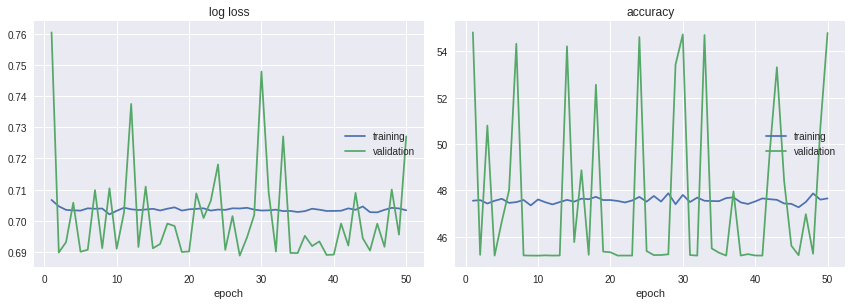

log loss:
training   (min:    0.702, max:    0.707, cur:    0.703)
validation (min:    0.689, max:    0.760, cur:    0.727)

accuracy:
training   (min:   47.266, max:   47.872, cur:   47.650)
validation (min:   45.178, max:   54.821, cur:   54.797)
Final validation loss for current fold: 0.7270606756210327
-------------------------------
2-fold validation has been executed, mean validation loss: 0.7112228870391846


In [0]:
# Train the model
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', 
                                                       verbose=True, patience=8)
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True)
fold_val_losses = []
saved_plots = []
file_name_base = '/content/gdrive/My Drive/Colab Notebooks/data/btc/plots/{}_fold_'.format(time.time())
fold = 0
for train_indexes, validation_indexes in kf.split(full_dataset):
    fold += 1
    liveloss = PlotLosses(save_img=True, file_name=file_name_base + str(fold) + '.png')

    train = torch.utils.data.dataset.Subset(full_dataset, train_indexes)
    validation = torch.utils.data.dataset.Subset(full_dataset, validation_indexes)
    
    model = ConvNet(num_classes).to(device)
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        
    # Set train and validation data loaders.
    train_loader = torch.utils.data.DataLoader(dataset=train,
                                               batch_size=batch_size,
                                               drop_last=True,
                                               shuffle=True)
    val_loader = torch.utils.data.DataLoader(dataset=validation,
                                              batch_size=batch_size,
                                              drop_last=True,
                                              shuffle=True)
    total_step = len(train_loader)
    print('-------------------------------')
    print('Starting training for new fold')
    print('-------------------------------')
    for epoch in range(num_epochs):
        train_loss, train_acc = train_model(train_loader)
        val_loss, val_acc = validate_model(val_loader)
        scheduler.step(val_loss)
        liveloss.update({
            'log loss': train_loss,
            'val_log loss': val_loss,
            'accuracy': train_acc,
            'val_accuracy': val_acc
        })
        liveloss.draw()
    
    print('Final validation loss for current fold: {}'.format(val_loss))
    fold_val_losses.append(val_loss)
    saved_plots.append(liveloss)
    
print('-------------------------------')
print('{}-fold validation has been executed, mean validation loss: {}'.
      format(n_folds, np.mean(fold_val_losses)))

np.save('/content/gdrive/My Drive/Colab Notebooks/data/btc/plots_crossval_{}_{}_{}.npy'.
        format(num_epochs, batch_size, time.time()), np.array(saved_plots))

### Note: unfortunately the function above overwrites older plots. However, I've saved them into the list below. So you can access them by simply accessing the corresponding index.

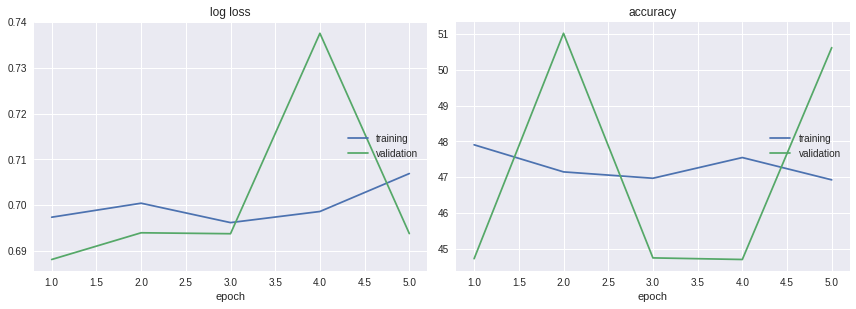

log loss:
training   (min:    0.696, max:    0.707, cur:    0.707)
validation (min:    0.688, max:    0.738, cur:    0.694)

accuracy:
training   (min:   46.925, max:   47.906, cur:   46.925)
validation (min:   44.697, max:   51.025, cur:   50.624)


In [0]:
saved_plots[1].draw()


## Train and test final model

In [664]:
'''
Thus far best with lr=0.001 and Adam, no reduceLronplateau yet and batch_size 32.

Seems to work better without user-data, could be due to the sheer amount of user-data
in respective training/validation/test sets. E.g. User A might be very present in training set, but not so much in validation/test set.

When removing users with a lower than 25th percentile amount of followers doesn't help.
'''

# Init model
model = ConvNet(num_classes).to(device)

if multi_class:
    criterion = nn.CrossEntropyLoss()
else:
    criterion = nn.BCELoss()    
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)#, weight_decay=1e-2)#S

# Set train and validation data loaders.
len_train = int(len(full_dataset) * 0.8)
len_val = len(full_dataset) - len_train
len_train_temp = len_train

train, validation = torch.utils.data.dataset.random_split(full_dataset, [len_train, len_val])
# len_train = [x for x in range(0, len_train_temp)]
# len_val = [x for x in range(len_train_temp, len(full_dataset))]
# train = torch.utils.data.dataset.Subset(full_dataset, len_train)
# validation = torch.utils.data.dataset.Subset(full_dataset, len_val)


train_loader = torch.utils.data.DataLoader(dataset=train,
                                           batch_size=batch_size,
                                           drop_last=True,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=validation,
                                          batch_size=batch_size,
                                          drop_last=True,
                                          shuffle=True)

total_step = len(train_loader)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', 
                                                      verbose=True, patience=5)

train_losses, train_aucs, val_losses, val_aucs = [], [], [], []
for epoch in range(num_epochs):
    train_loss, train_auc, _, _ = train_model(train_loader, multi_class)
    val_loss, val_auc, _, _ = validate_model(val_loader, multi_class)
    train_losses.append(train_loss)
    train_aucs.append(train_auc)
    val_losses.append(val_loss)
    val_aucs.append(val_aucs)
    print('At end of epoch, average (training) loss: {}, MAP: {} '.format(train_loss, train_auc))
    print('At end of epoch, average (validation) loss: {}, MAP: {} '.format(val_loss, val_auc))
    scheduler.step(val_loss)

auc, y, pred = test_model(test_loader, multi_class)

# Save the model checkpoint
torch.save(model.state_dict(), '/content/gdrive/My Drive/Colab Notebooks/data/btc/models/model_{}_{}_{}_{}_{}.ckpt'.format(
    num_epochs, batch_size, model_type, auc, time.time()))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Epoch [1/16], Step [1/561], Loss: 0.7694
Epoch [1/16], Step [188/561], Loss: 0.7632
Epoch [1/16], Step [375/561], Loss: 0.7411
Epoch [1/16], val MAP/acc: 0.44447373973581317, val loss: 0.7071285843849182
At end of epoch, average (training) loss: 0.7312842011451721, MAP: 0.44108810828165906 
At end of epoch, average (validation) loss: 0.7071285843849182, MAP: 0.44447373973581317 
Epoch [2/16], Step [1/561], Loss: 0.7070
Epoch [2/16], Step [188/561], Loss: 0.6866
Epoch [2/16], Step [375/561], Loss: 0.6865
Epoch [2/16], val MAP/acc: 0.44596030261555836, val loss: 0.6856743693351746
At end of epoch, average (training) loss: 0.6865322589874268, MAP: 0.443301055226098 
At end of epoch, average (validation) loss: 0.6856743693351746, MAP: 0.44596030261555836 
Epoch [3/16], Step [1/561], Loss: 0.7025
Epoch [3/16], Step [188/561], Loss: 0.6865
Epoch [3/16], Step [375/561], Loss: 0.6862
Epoch [3/16], val MAP/acc: 0.45227005932337283, val loss: 0.685734212398529
At end of epoch, average (training)

Test MAP: 0.3752087754055172
(array([0, 1]), array([14914,  3006]))
(array([0, 1]), array([11422,  6498]))
The accuracy is: 0.6004464285714286
Average precision-recall score: 0.38


Text(0.5,1,'2-class Precision-Recall curve: AP=0.38')

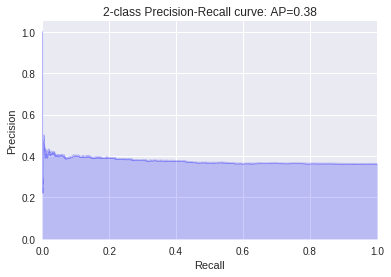

In [665]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

auc, y, pred = test_model(test_loader, multi_class)
#losses, auc, y, pred = validate_model(val_loader, multi_class)
#losses, auc, y, pred = train_model(train_loader, multi_class)

preds = [1 if x > 0.5 else 0 for x in pred]
print(np.unique(preds, return_counts=True))
print(np.unique(y, return_counts=True))
print('The accuracy is: {}'.format(accuracy_score(y, preds)))

average_precision = average_precision_score(y, pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(y, pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

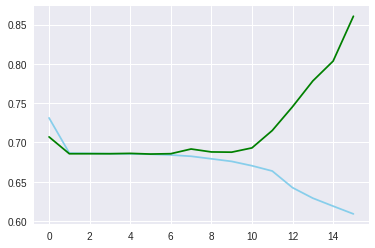

In [666]:
# Make plot.
plt.plot(train_losses, color='skyblue')
plt.plot(val_losses, color='green')
plt.show()

In [0]:
plt.plot(train_aucs, color='skyblue')
plt.plot(val_aucs, color='green')
plt.show()

In [267]:
auc, y, pred = test_model(test_loader, multi_class)

Test MAP: 0.40002634756017913


# Trading strategy

## Perform forward pass on training set to generate data for Logistic Regression and majority vote

In [0]:
train_loader = torch.utils.data.DataLoader(dataset=full_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
train_lr = None

model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    for images, labels, user_data, dates, btc_meta_data in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        user_data = user_data.to(device)
        btc_meta_data = btc_meta_data.to(device)
        outputs = model(images, user_data, btc_meta_data)
        predicted = torch.max(outputs, 1)[1].data.cpu().numpy()

        if multi_class:
            labels = torch.max(labels, 1)[1].data.cpu().numpy()
            temp = np.dstack((labels, user_data.data.cpu().numpy()[:,-1],
                           dates.data.cpu().numpy(), predicted)).squeeze()
            temp = np.hstack((outputs, temp))
            
        else:
            outputs = np.array([x[0] for x in outputs.data.cpu().numpy()])
            temp = np.dstack((outputs, labels, 
                               user_data.data.cpu().numpy()[:,-1],
                               dates.data.cpu().numpy(), predicted)).squeeze()
        if train_lr is None:
            train_lr = temp
        else:
            train_lr = np.concatenate((train_lr, temp), axis=0)

In [0]:
test_loader = torch.utils.data.DataLoader(dataset=test, batch_size=batch_size, shuffle=False, drop_last=True)
test_lr = None
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)

with torch.no_grad():
    for images, labels, user_data, dates, btc_meta_data in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        user_data = user_data.to(device)
        btc_meta_data = btc_meta_data.to(device)
        outputs = model(images, user_data, btc_meta_data)
        predicted = torch.max(outputs, 1)[1].data.cpu().numpy()

        if multi_class:
            labels = torch.max(labels, 1)[1].data.cpu().numpy()
            temp = np.dstack((labels, user_data.data.cpu().numpy()[:,-1],
                           dates.data.cpu().numpy(), predicted)).squeeze()
            temp = np.hstack((outputs, temp))
        else:
            outputs = np.array([x[0] for x in outputs.data.cpu().numpy()])
            temp = np.dstack((outputs, labels, 
                               user_data.data.cpu().numpy()[:,-1],
                               dates.data.cpu().numpy(), predicted)).squeeze()
        
        if test_lr is None:
            test_lr = temp
        else:
            test_lr = np.concatenate((test_lr, temp), axis=0)

## Create dataframe for LR and MV

In [0]:
import pandas as pd

if multi_class:
    train_df = pd.DataFrame({'output1':train_lr[:,0], 'output2':train_lr[:,1], 'output3':train_lr[:,2], 'true':train_lr[:,3], 
                                   'user':train_lr[:,4], 'date':train_lr[:,5], 'pred_max':train_lr[:,6]})
    test_df = pd.DataFrame({'output1':test_lr[:,0], 'output2':test_lr[:,1], 'output3':test_lr[:,2], 'true':test_lr[:,3], 
                                   'user':test_lr[:,4], 'date':test_lr[:,5], 'pred_max':test_lr[:,6]})
else:
    train_df = pd.DataFrame({'output':train_lr[:,0],'true':train_lr[:,1], 
                                       'user':train_lr[:,2], 'date':train_lr[:,3], 'pred_max':train_lr[:,4]})
    test_df = pd.DataFrame({'output':test_lr[:,0],'true':test_lr[:,1], 
                                       'user':test_lr[:,2], 'date':test_lr[:,3], 'pred_max':test_lr[:,4]})

In [0]:
# # Reset vars that we do not need anymore.
# train_classes, train_user_data, train_matrices, train_dates, train_btc_meta_data, train_classes_t = None, None, None, None, None, None
# test_classes, test_user_data, test_matrices, test_dates, test_btc_meta_data, test_classes_t = None, None, None, None, None, None

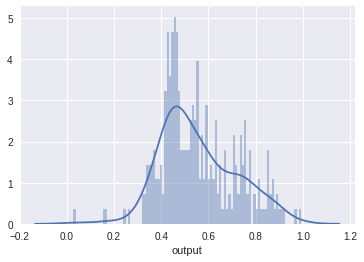

In [0]:
import seaborn 

seaborn.distplot(train_df['output'][train_df['date'] == 17548.0], bins=100)

## Thresholding training (only for binary classification)

In [101]:
data_MV = train_df[['date', 'output', 'true', 'pred_max']]
cnt_MV = 0
cnt_max = 0
pairs = []
dates = data_MV['date'].unique()
score = 0
for i in range(35, 75):
    threshold = i / 100
    cnt_MV = 0
    cnt_max = 0
    pairs = []
    for date in dates:
        temp = data_MV[data_MV['date'] == date]
        y_true = temp['true'].unique()[0]
        MV = temp['pred_max'].value_counts().index[0]

        max_all = temp['output'].mean()
        max_all = 1 if max_all >= threshold else 0

        if y_true == MV:
            cnt_MV += 1
        if y_true == max_all:
            cnt_max += 1
            #print('correct', y_true, temp['output'].mean())
        else:
            #print('wrong', y_true, temp['output'].mean())
            pairs.append([max_all, y_true])
    new_score = cnt_max / len(dates)
    if new_score > score:
        best_thresh = threshold
        score = new_score
print('The best score was {} with threshold {}'.format(score, best_thresh))
print('Performing MV resulted in an acc of: {}'.format(cnt_MV / len(dates)))

The best score was 1.0 with threshold 0.35
Performing MV resulted in an acc of: 0.5671140939597316


## Use best threshold for training set on test set to measure performance OR get mean per date for multi-class

wrong 0.0 0.9952335760463029
correct 0.0 0.00014326866085382142
correct 0.0 0.019497240317443473
correct 0.0 0.0023210438412624873
correct 0.0 1.0227786602983316e-06
correct 0.0 3.211438819097576e-07
correct 0.0 0.33579067032241344
wrong 0.0 1.0
wrong 0.0 0.999840162678222
correct 0.0 0.016295445952269987
wrong 1.0 5.6465122497684206e-05
wrong 0.0 0.98841902139175
wrong 0.0 0.9961203645757838
correct 1.0 1.0
wrong 0.0 0.921021204592404
correct 1.0 0.938461020250212
correct 0.0 0.2705615953937251
correct 1.0 0.9742585046494261
wrong 0.0 0.9853162608220956
correct 1.0 0.9999878625075023
correct 1.0 0.9964446663017005
wrong 1.0 1.6505271623084253e-05
wrong 0.0 0.9605338972797046
correct 1.0 0.9869302665631388
correct 0.0 1.2693716236544707e-05
wrong 0.0 1.0
correct 1.0 0.987283856432507
wrong 0.0 0.9998957683073234
wrong 0.0 0.9999806099768841
wrong 0.0 0.9999951882795854


Text(0.5,257.44,'Predicted label')

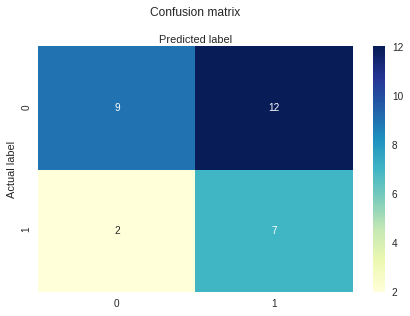

In [116]:
#data_MV = test_df[['date', 'output', 'true', 'pred_max']]
cnt_max = 0
pairs = []
dates = test_df['date'].unique()
y_test = []
y_pred = []
for date in dates:
    temp = test_df[test_df['date'] == date]
    y_true = temp['true'].unique()[0]
    
    MV = temp['pred_max'].value_counts().index[0]
    
    if multi_class:
        # Mean per column
        max_out = temp[['output1', 'output2', 'output3']].mean(axis=0).values
        max_all = np.argmax(max_out)
    else:
        max_out = temp['output'].mean()
        max_all = 1 if max_out > best_thresh else 0
    
    y_test.append(y_true)
    y_pred.append(max_all)
    if y_true == max_all:
        cnt_max += 1
        print('correct', y_true, max_out)
    else:
        print('wrong', y_true, max_out)
        pairs.append([max_all, y_true])

        
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Create dataset LR multiclass

In [0]:
'''
We create a matrix with all zeroes and replace the user predictions if there
are any. If there's none, then we simply leave it at zero.

As we have three predictions per user/day, our matrix is 3x as wide as
in our binary case, ex:

[user_1_pred_c1, user_1_pred_c2, user_1_pred_c3, user_2_pred_c1, ..]
'''


# # Get all users
train_users = train_df['user'].unique()
test_users = test_df['user'].unique()
# print(train_users)
# print(test_users)
users = np.unique(np.concatenate((train_users, test_users)))
# # Assign users a unique id from 0 to n unique ids, 
# # create a dictionairy using training data and re-use during test time.
user_ids_lr = {}
cnt = 0
for i, v in enumerate(users):
    if cnt == 0:
        add = 0
    elif cnt == 1:
        add = 2
    else: 
        add = 3
    cnt += 1
    
    user_ids_lr[v] = i + add

# Loop over dates, check if user has prediction
X_train = None
y_train = []
cnt = 0
for date in train_df['date'].unique():
    cnt += 1
    temp = train_df[train_df['date'] == date]
    arr = np.zeros(len(users) * 3)
    for row in temp.itertuples():
        usr = row[7]
        pred1 = row[2]
        pred2 = row[3]
        pred3 = row[4]
        lbl = row[6]
        arr[user_ids_lr[usr]] = pred1
        arr[user_ids_lr[usr]+1] = pred2
        arr[user_ids_lr[usr]+2] = pred3
        
    y_train.append([lbl])

    if X_train is None:
        X_train = arr
    else:
        X_train = np.vstack((X_train, arr))

y_train = np.array(y_train)  

In [0]:
# Loop over dates, check if user has prediction
X_test = None
y_test = []
cnt = 0
for date in test_df['date'].unique():
    cnt += 1
    temp = test_df[test_df['date'] == date]
    arr = np.zeros(len(users) * 3)
    for row in temp.itertuples():
        usr = row[7]
        pred1 = row[2]
        pred2 = row[3]
        pred3 = row[4]
        lbl = row[6]
        arr[user_ids_lr[usr]] = pred1
        arr[user_ids_lr[usr]+1] = pred2
        arr[user_ids_lr[usr]+2] = pred3
        
    y_test.append([lbl])
    if X_test is None:
        X_test = arr
    else:
        X_test = np.vstack((X_test, arr))

y_test = np.array(y_test)  

## Create dataset LR binary class

In [0]:
'''
For logistic regression we'd the following input:
[user_pred_1, .... user_pred_n]

We create a matrix with all zeroes and replace the user predictions if there
are any. If there's none, then we simply leave it at zero.

So we get a matrix per day with predictions for all users.
'''


# # Get all users
train_users = train_df['user'].unique()
test_users = test_df['user'].unique()
# print(train_users)
# print(test_users)
users = np.concatenate((train_users, test_users))
# # Assign users a unique id from 0 to n unique ids, 
# # create a dictionairy using training data and re-use during test time.
user_ids_lr = {}
for i, v in enumerate(users):
    user_ids_lr[v] = i

# Loop over dates, check if user has prediction
X_train = None
y_train = []
cnt = 0
for date in train_df['date'].unique():
    cnt += 1
    temp = train_df[train_df['date'] == date]
    arr = np.zeros(len(users))
    for row in temp.itertuples():
        usr = row[5]
        pred = row[2]
        lbl = row[4]
        arr[user_ids_lr[usr]] = pred
    y_train.append([lbl])
    if X_train is None:
        X_train = arr
    else:
        X_train = np.vstack((X_train, arr))

y_train = np.array(y_train)  

In [0]:
# Loop over dates, check if user has prediction
X_test = None
y_test = []

for date in test_df['date'].unique():
    cnt += 1
    temp = test_df[test_df['date'] == date]
    arr = np.zeros(len(users))
    for row in temp.itertuples():
        usr = row[5]
        pred = row[2]
        lbl = row[4]
        try:
            arr[user_ids_lr[usr]] = pred
        except:
            #print('User {} not found'.format(usr))
            cnt_n += 1
    y_test.append([lbl])
    if X_test is None:
        X_test = arr
    else:
        X_test = np.vstack((X_test, arr))

y_test = np.array(y_test)

## Perform Logistic Regression

In [604]:
from sklearn.linear_model import LogisticRegression


# instantiate the model (using the default parameters)
logreg = LogisticRegression(C=0.8)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_train)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, y_pred)
cnf_matrix

y_pred = logreg.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[16,  4],
       [ 8,  1]])

In [607]:
# Predict on test
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:,1]

print(average_precision_score(y_test, y_pred_prob))

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

0.45745253575713346


array([[16,  4],
       [ 8,  1]])

Text(0.5,257.44,'Predicted label')

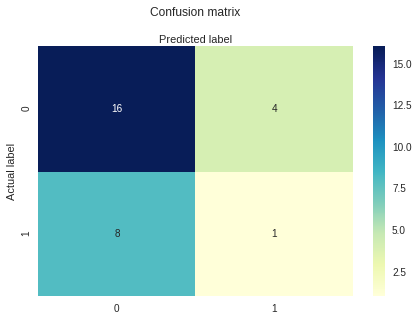

In [606]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')